<a href="https://colab.research.google.com/github/ccseibell/LoRA_complexity/blob/main/results/Lora_matricies_graph1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-0089c37517f8>:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lora_params = torch.load(file_path, map_location="cpu")


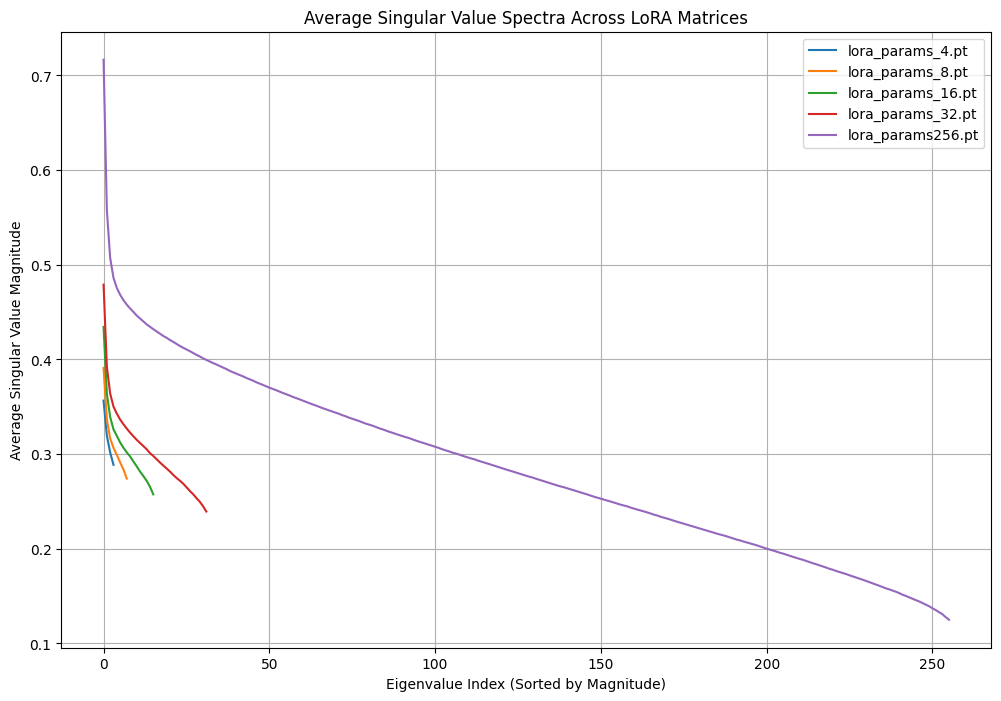

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# List of file paths for the LoRA matrices
file_paths = [
    "/content/lora_params_4.pt",
    "/content/lora_params_8.pt",
    "/content/lora_params_16.pt",
    "/content/lora_params_32.pt",
    "/content/lora_params256.pt",
]

# Analyze LoRA matrices
average_singular_values_dict = {}

for file_path in file_paths:
    lora_params = torch.load(file_path, map_location="cpu")
    all_singular_values = []  # Store singular values for all matrices in this file

    for name, matrix in lora_params.items():
        # Perform SVD on the matrix to compute singular values
        matrix_np = matrix.cpu().detach().numpy()
        singular_values = np.linalg.svd(matrix_np, compute_uv=False)
        all_singular_values.append(singular_values)

    # Compute the average singular values across all matrices in this file
    average_singular_values = np.mean(np.array(all_singular_values), axis=0)
    average_singular_values_dict[file_path] = average_singular_values

# Plot average singular value spectra for each file
plt.figure(figsize=(12, 8))
for file_path, singular_values in average_singular_values_dict.items():
    plt.plot(
        range(len(singular_values)),
        sorted(singular_values, reverse=True),
        label=file_path.split("/")[-1],  # Use file name for legend
    )

plt.xlabel("Eigenvalue Index (Sorted by Magnitude)")
plt.ylabel("Average Singular Value Magnitude")
plt.title("Average Singular Value Spectra Across LoRA Matrices")
plt.legend()
plt.grid()
plt.show()
